# Microéconomie 5
## TD1 : Répartition optimale des ressources

### Exercice 1 : Préférences Cobb-Douglas

Les dotations de l'économie sont $\omega_1 = 40$ et $\omega_2 = 10$. Les agents ont les fonctions d'utilité

\begin{aligned}
    U^A(x^A) &= (x_1^A)^\frac{1}{2} (x_2^A)^\frac{1}{2} \\
    U^B(x^B) &= (x_1^B)^\frac{1}{4} (x_2^B)^\frac{1}{4}.
\end{aligned}


*Le code suivant définit ces données du problème.*

In [1]:
ω1 <- 40                                     # dotation totale en bien 1
ω2 <- 10                                     # dotation totale en bien 2
UA <- function(x1, x2) x1^(1/2) * x2^(1/2)   # fonction d'utilité de A
UB <- function(x1, x2) x1^(1/4) * x2^(1/4)   # fonction d'utilité de B
x1 <- seq(0, ω1, length=1000)                # série de valeurs de x1 pour tracer les courbes

#### Question 1.
Représentons la carte d'indifférence de $A$ dans la boîte d'Edgeworth.

La courbe d'indifférence de $A$ pour un niveau d'utilité fixé $U_0$ est définie par l'équation
\begin{equation}
    U^A(x^A) = U_0
    \iff
    x_2^A = \frac{ (U_0)^2 }{ x_1^A }.
\end{equation}

On souhaite tracer cette courbe pour plusieurs niveaux d'utilité $U_0$.


*Le code suivant commence par définir une fonction `indiffA`, qui prend en argument un niveau d'utilité `U` et qui renvoit les points de la courbe d'indifférence correspondant à ce niveau d'utilité. On trace ensuite les courbes d'indifférence de $A$ (en bleu) pour des niveaux d'utilité bien choisis. Anticipant la question 2, on représente aussi l'ensemble des paniers au-dessus d'une des courbe d'indifférence (en gris).*


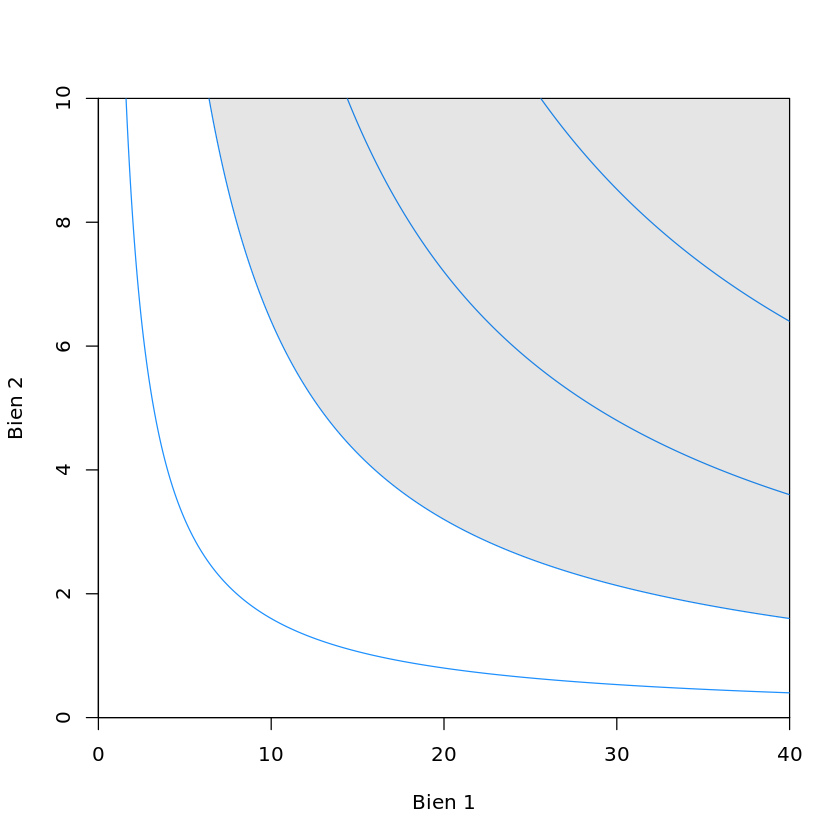

In [2]:
indiffA <- function(U) U^2 / x1

niveauxA <- seq(UA(ω1/5, ω2/5), UA(4*ω1/5, 4*ω2/5), len = 4)

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs = "i", yaxs = "i")
for (U in niveauxA) lines(x1, indiffA(U), col = "dodgerblue", ylim = c(0, ω2))            # courbes d'indifférence de A

polygon( c(x1,ω1), c(indiffA(niveauxA[2]),ω2), col=rgb(0,0,0,.1), border=NA)              # ensemble des paniers préférés ou équivalents à x^A

#### Question 2.
Rappelons la définition : les préférences de $A$ sont convexes si pour tout panier $x^A$, l'ensemble des paniers préférés ou équivalents à $x^A$ est convexe.

L'ensemble des paniers préférés ou équivalents à $x^A$ correspond simplement à l'ensemble qui se situe au-dessus de la courbe d'indifférence de $A$ passant par $x^A$. En pratique, il s'agit donc de vérifier que pour chaque courbe d'indifférence de $A$, l'ensemble au-dessus de cette courbe est convexe.

C'est bien le cas ici, comme on peut le constater sur la carte d'indifférence de $A$ (exemple d'un tel ensemble en gris sur le graphe ci-dessus).

De façon similaire, les courbes d'indifférence de $B$ sont données par
\begin{equation}
    U^B(x^B) = U_0
    \iff
    x_2^B = \frac{(U_0)^4}{x_1^B}
\end{equation}
d'où l'on déduit que les préférences de $B$ sont convexes également.

Représentons maintenant les deux cartes d'indifférence dans la boîte d'Edgeworth.


*Le code suivant reproduit pour $B$ la procédure suivie ci-dessus pour $A$. On trace ensuite les courbes d'indifférence de $A$ en bleu et celles de $B$ en orange.*

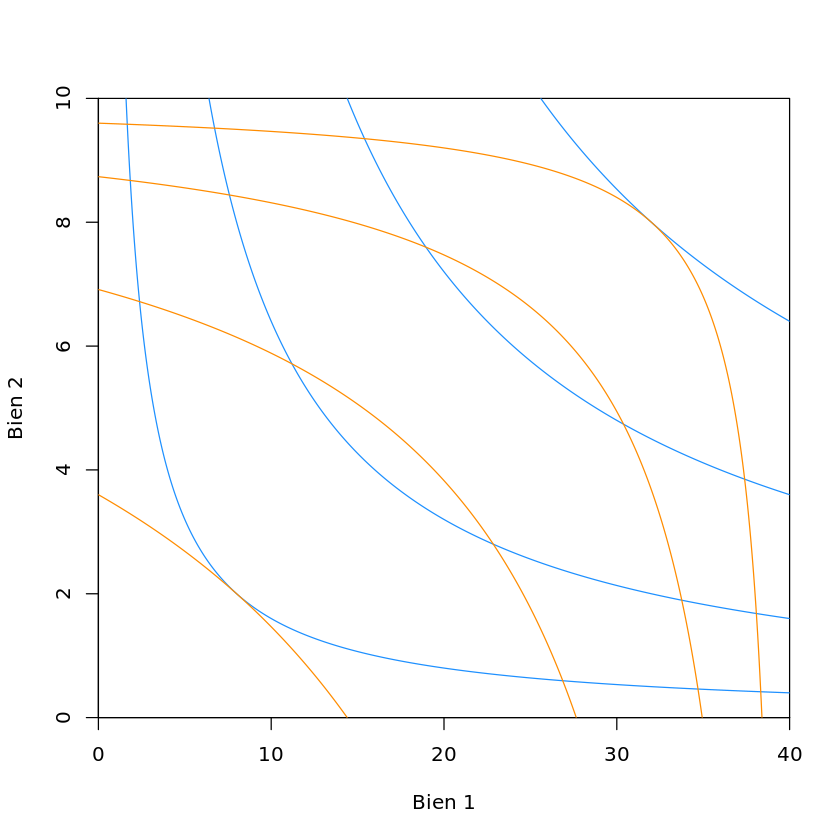

In [3]:
indiffB <- function(U) U^4 / x1

niveauxB <- seq(UB(ω1/5, ω2/5), UB(4*ω1/5, 4*ω2/5), len = 4)

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs = "i", yaxs = "i")
for (U in niveauxA) lines(x1, indiffA(U), col = "dodgerblue", ylim = c(0, ω2))            # courbes d'indifférence de A
for (U in niveauxB) lines(x1, rev(ω2 - indiffB(U)), col = "darkorange", ylim = c(0, ω2))  # courbes d'indifférence de B

#### Question 3.

La fonction d'utilité de $B$ s'obtient par une transformation strictement croissante (fonction racine carrée $\sqrt{\cdot}$) de celle de $A$ :

\begin{equation}
    U^B (x_1, x_2)
    = (x_1)^\frac{1}{4} (x_2)^\frac{1}{4}
    = \sqrt{ (x_1)^\frac{1}{2} (x_2)^\frac{1}{2} }
    = \sqrt{ U^A (x_1, x_2) }.
\end{equation}

Les agents $A$ et $B$ ont donc les mêmes préférences.

#### Question 4.
Traitons d'abord le cas général pour obtenir la courbe des optima de Pareto : il faut résoudre le programme

\begin{equation}
    \max_{x^A, x^B} \; U^A(x^A) \qquad
        \text{s.c.} \; \begin{cases}
        U^B(x^B) \geq \underline U^B \\
        x_1^A + x_1^B \leq \omega_1 \\
        x_2^A + x_2^B \leq \omega_2 \\
        x_i^k \geq 0 \; (\forall i \in \{1, 2\}, k \in \{A, B\}).
        \end{cases}
\end{equation}

Ignorons _a priori_ les contraintes de positivité des allocations (i.e. supposons que les solutions sont internes). Le lagrangien associé à ce problème est alors

\begin{equation}
    \mathcal L (x^A, x^B, \lambda, \mu_1, \mu_2)
    = (x_1^A)^\frac{1}{2} (x_2^A)^\frac{1}{2}
    + \lambda \big( (x_1^B)^\frac{1}{4} (x_2^B)^\frac{1}{4} - \underline U^B \big)
    + \mu_1 (\omega_1 - x_1^A - x_1^B)
    + \mu_2 (\omega_2 - x_2^A - x_2^B).
\end{equation}

On en déduit les conditions du premier ordre par rapport aux sept variables $x_1^A$, $x_2^A$, $x_1^B$, $x_2^B$, $\lambda$, $\mu_1$, et $\mu_2$,

\begin{aligned}
    &\tfrac{1}{2} (x_1^A)^{-\frac{1}{2}} (x_2^A)^\frac{1}{2} - \mu_1 = 0 \\
    &\tfrac{1}{2} (x_1^A)^\frac{1}{2} (x_2^A)^{-\frac{1}{2}} - \mu_2 = 0 \\
    &\lambda \tfrac{1}{4} (x_1^B)^{-\frac{3}{4}} (x_2^B)^\frac{1}{4} - \mu_1 = 0 \\
    &\lambda \tfrac{1}{4} (x_1^B)^\frac{1}{4} (x_2^B)^{-\frac{3}{4}} - \mu_2 = 0 \\
    &(x_1^B)^\frac{1}{4} (x_2^B)^\frac{1}{4} = \underline U^B \\
    &x_1^A + x_1^B = \omega_1 \\
    &x_2^A + x_2^B = \omega_2.
\end{aligned}

Une combinaison adéquate de ces équations fournit

\begin{equation}
    \underbrace{ \frac{x_2^A}{x_1^A} }_{= \mathsf{TMS}^A} = \frac{\mu_1}{\mu_2} = \underbrace{\frac{x_2^B}{x_1^B}}_{= \mathsf{TMS}^B} = \frac{\omega_2 - x_2^A}{\omega_1 - x_1^A}
\end{equation}

que l'on résout pour finalement obtenir les $x_2^A$ optimaux en fonction de $x_1^A$ :

\begin{equation}
    \boxed{ x_2^A = \frac{\omega_2}{\omega_1} x_1^A }
    \overset{\text{A.N.}}{=} \frac{x_1^A}{4}.
\end{equation}

Les contraintes de positivité sont vérifiées tant que $0 \leq x_1^A \leq 40$. L'ensemble des allocations optimales est donc

\begin{equation}
    \left\{
    (x_1^A,
    x_2^A = \tfrac{x_1^A}{4},
    x_1^B = 40 - x_1^A,
    x_2^B = 10 - \tfrac{x_1^A}{4} ),
    \; 0 \leq x_1^A \leq 40
    \right\}.
\end{equation}


Trouvons maintenant laquelle parmi ces allocations optimales fournit à $B$ l'utilité $U^B(x^B) = 2$. On résout

\begin{align}
    U^B(x^B) = 2
    &\iff (40 - x_1^A)^\frac{1}{4} (10 - \tfrac{x_1^A}{4})^\frac{1}{4} = 2 \\
    &\iff (40 - x_1^A) (10 - \tfrac{x_1^A}{4}) = 2^4 = 16 \\
    &\iff (40 - x_1^A)^2 = 4 \times 16 = 64 \\
    &\iff 40 - x_1^A = \sqrt{64} = 8 \\
    &\iff x_1^A = 40 - 8 = 32. \\
\end{align}

Cette allocation optimale précise est donc $(x_1^A = 32, x_2^A = 8, x_1^B = 8, x_2^B = 2)$. (On peut ensuite vérifier que l'on a bien $U^B(8, 2) = 8^\frac{1}{4} 2^\frac{1}{4} = 2$).


#### Question 5.

Nous avons trouvé ci-dessus l'ensemble des allocations Pareto-optimales.

Nous avons aussi vu que la courbe des optima a pour équation

\begin{equation}
    x_2^A = \frac{x_1^A}{4}.
\end{equation}

En substituant $x_2^A = 10 - x_2^B$ et $x_1^A = 40 - x_1^B$, on retrouve l'équation de cette courbe en fonction des allocations de $B$ :

\begin{equation}
    x_2^B = \frac{x_1^B}{4}.
\end{equation}

#### Question 6.
Représentons la courbe des optima.


*Le code suivant définit une fonction `optima` qui prend en argument une allocation en bien 1 `x` et renvoie l'allocation optimale en bien 2 correspondante, selon la formule trouvée ci-dessus. On trace la courbe des optima (en violet), ainsi que quelques courbes d'indifférence : on remarque que les optima de Pareto sont bien les points de tangence entre les courbes d'indifférence de $A$ et de $B$.*

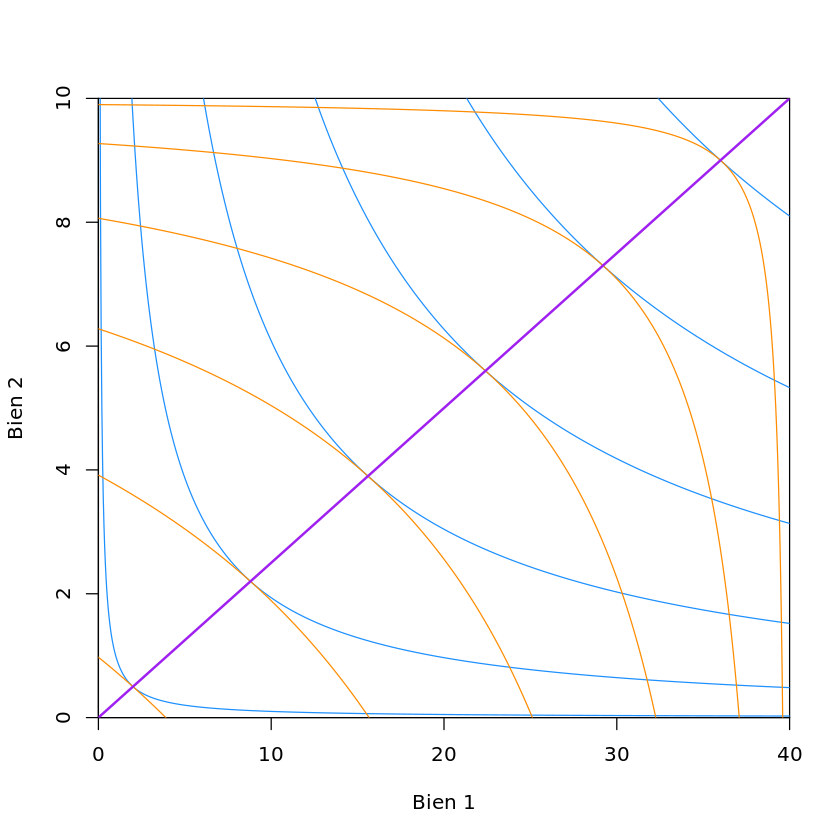

In [4]:
optima <- function(x) ω2 / ω1 * x

allocA1 <- seq(.05*ω1, .9*ω1, len=6)             # allocations de A en bien 1 pour les courbes d'indifférence

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
for (i in 1:length(allocA1)) {                   # courbes d'indifférence tangentes
    xA1 <- allocA1[i]
    xA2 <- optima(allocA1[i])
    lines(x1, indiffA(UA(xA1, xA2)), col = "dodgerblue", ylim = c(0, ω2))
    lines(x1, rev(ω2 - indiffB(UB(ω1 - xA1, ω2 - xA2))), col = "darkorange", ylim = c(0, ω2))
}
lines(x1, optima(x1), col = "purple", lwd = 2)   # courbe des optima

#### Question 7. 
On souhaite représenter les utilités atteintes par les agents $A$ et $B$ aux optima de Pareto dans l'espace $(U^A, U^B)$.

Tout d'abord, calculons le niveau d'utilité $U^A$ de $A$ en fonction de $x_1^A$ quand l'allocation est optimale, c'est-à-dire quand $x_2^A  = \frac{x_1^A}{4}$. On a alors

\begin{equation}
    U^A = (x_1^A)^\frac{1}{2} \left( \frac{x_1^A}{4} \right)^\frac{1}{2} = \frac{x_1^A}{2}.
\end{equation}

Faisons de même pour $B$ :

\begin{equation}
    U^B = (40 - x_1^A)^\frac{1}{4} \left( 10 - \frac{x_1^A}{4} \right)^\frac{1}{4}
    = \left( 20 - \frac{x_1^A}{2} \right)^\frac{1}{2}
    = (20 - U^A)^\frac{1}{2}.
\end{equation}

À partir de cette expression, on peut représenter les niveaux d'utilité à l'optimum dans l'espace $(U^A, U^B)$ (en violet sur le graphe ci-dessous).


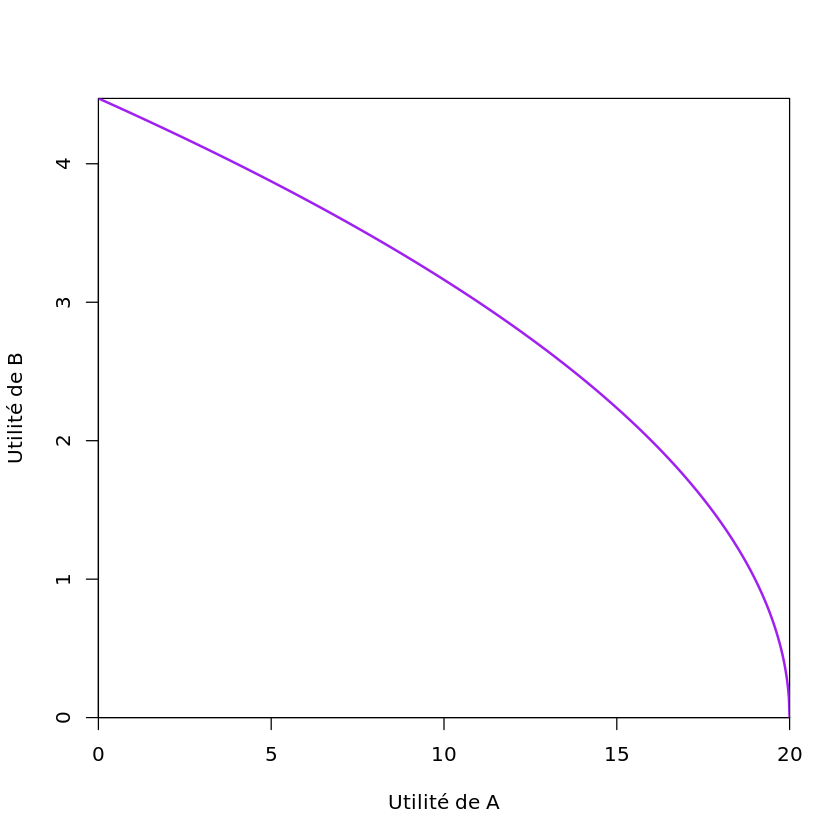

In [17]:
plot(x = x1, y = x1, xlim = c(0, UA(ω1, ω2)), ylim = c(0, UB(ω1, ω2)),
     type = "n", asp=NA, xlab="Utilité de A", ylab="Utilité de B", xaxs="i", yaxs="i")
UApoints <- seq(0, 20, length=1000)
lines(UApoints , sqrt(20 - UApoints), col = "purple", lwd = 2)

#### Question 8. 
Prenons par exemple $I$ telle que $x_1^A = 25$ et $x_2^A = 3$ (non optimale), et représentons dans un premier temps l'ensemble des allocations optimales **et** préférées ou équivalentes à $I^A$ par $A$ (en pointillés bleus).

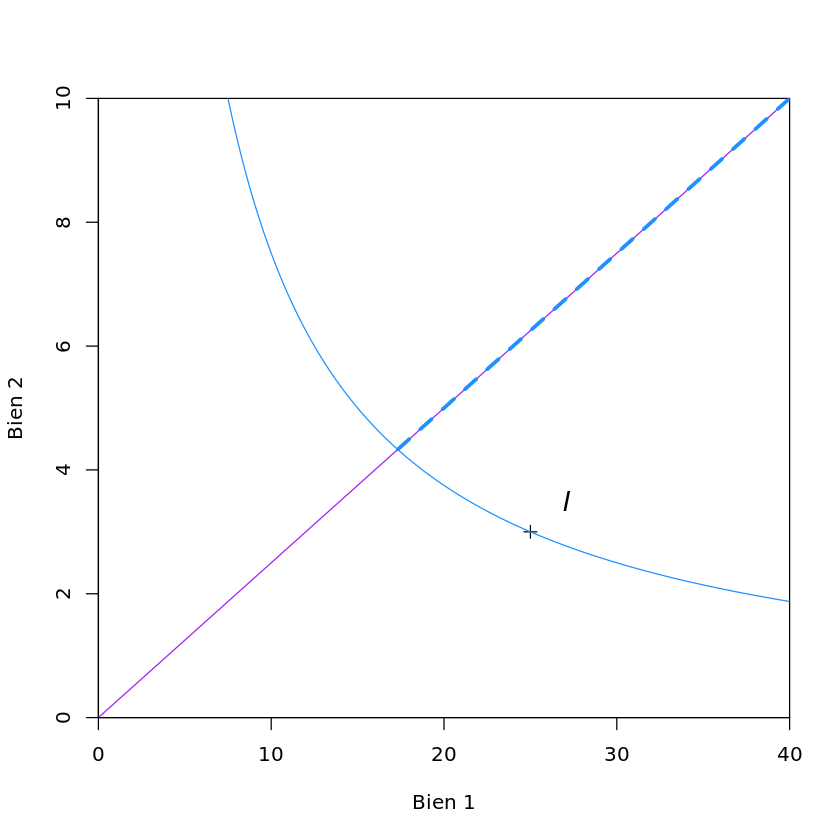

In [6]:
I <- c(25, 3)
XA <- x1[ UA(x1, optima(x1)) > UA(I[1], I[2]) ]                              # allocations acceptées par A

# Allocations acceptées par A

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                  # point I
    text(I[1]+.05*ω1, I[2]+.05*ω2, labels = "I", cex = 1.3, font = 3)
lines(x1, optima(x1), col = "purple", lwd = 1)                               # courbe des optima
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, ω2))      # courbe d'indifférence de A passant par I
lines(XA, optima(XA), col = "dodgerblue", lwd = 3, lty = 2)                  # allocations acceptées par A

Représentons maintenant l'ensemble correspondant pour $B$ (en pointillés oranges).

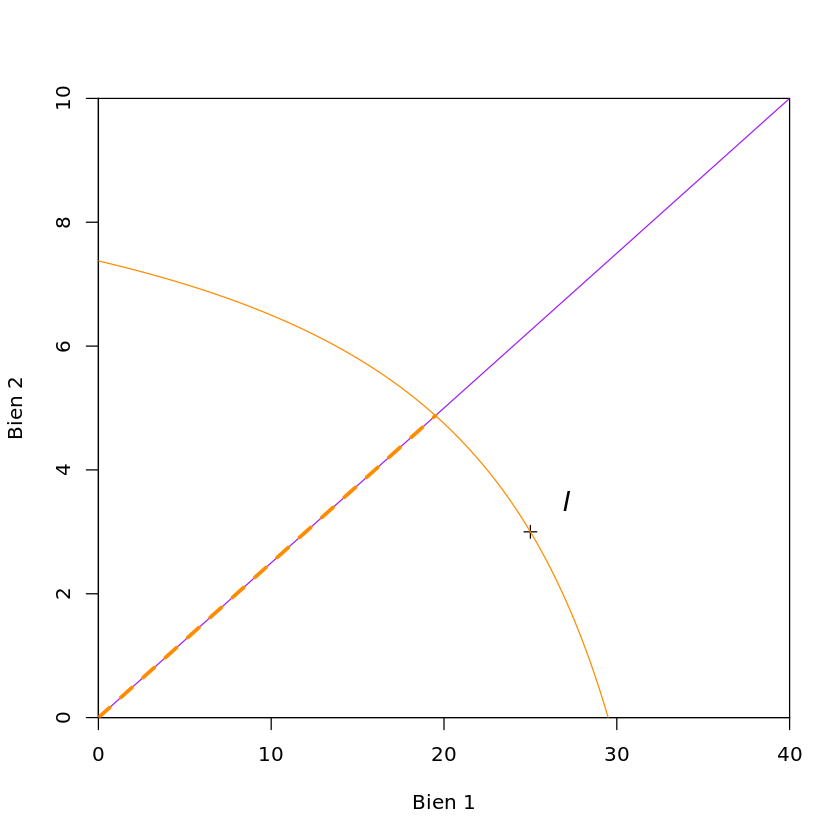

In [7]:
XB <- x1[ UB(ω1 - x1, ω2 - optima(x1)) > UB(ω1 - I[1], ω2 - I[2]) ]

# Allocations acceptées par B

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                  # point I
    text(I[1]+.05*ω1, I[2]+.05*ω2, labels = "I", cex = 1.3, font = 3)
lines(x1, optima(x1), col = "purple", lwd = 1)                               # courbe des optima
lines(x1, rev(ω2 - indiffB(UB(ω1 - I[1], ω2 - I[2]))), col = "darkorange", ylim = c(0, ω2)) # courbe d'indifférence de B passant par I
lines(XB, optima(XB), col = "darkorange", lwd = 3, lty = 2)                  # allocations acceptées par B

Le _coeur de l'économie_ correspond à l'intersection de ces deux ensembles en pointillés : représentons-le ici en trait noir.

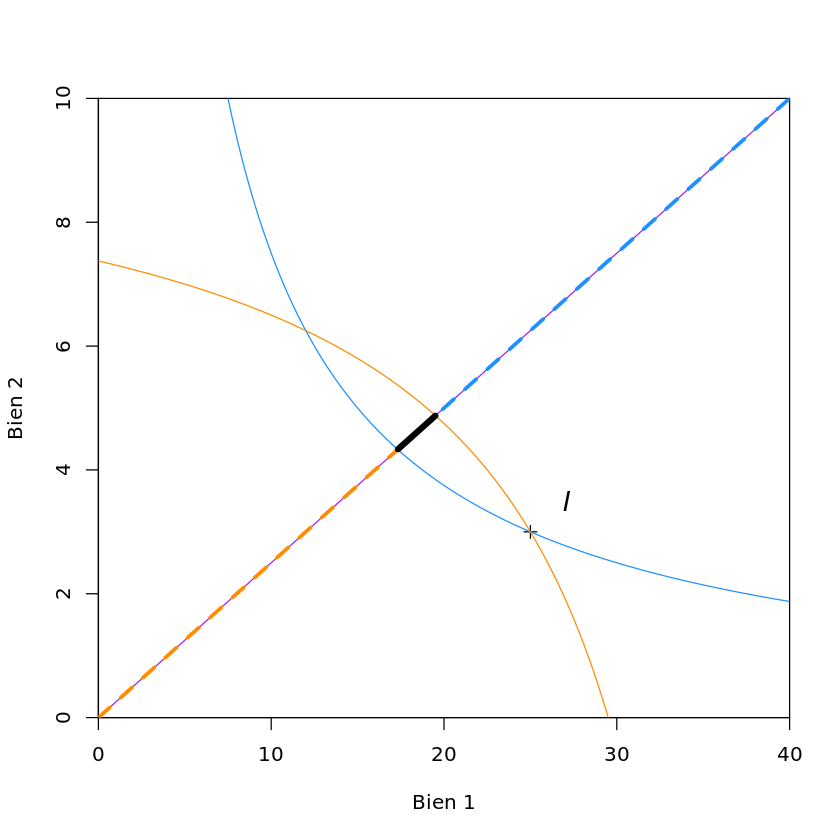

In [8]:
# Allocations acceptées par A

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                  # point I
    text(I[1]+.05*ω1, I[2]+.05*ω2, labels = "I", cex = 1.3, font = 3)
lines(x1, optima(x1), col = "purple", lwd = 1)                               # courbe des optima
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, ω2))      # courbe d'indifférence de A
lines(XA, optima(XA), col = "dodgerblue", lwd = 3, lty = 2)                  # allocations acceptées par A

# Allocations acceptées par B

lines(x1, rev(ω2 - indiffB(UB(ω1 - I[1], ω2 - I[2]))), col = "darkorange", ylim = c(0, ω2)) # CI B
lines(XB, optima(XB), col = "darkorange", lwd = 3, lty = 2)                  # allocations acceptées par B

# Allocations acceptées par A et B
XAB <- intersect(XA, XB)
lines(XAB, optima(XAB), col = "black", lwd = 5)


#### Question 9.

Toutes les allocations du coeur de l'économie sont Pareto-optimales. Or le critère de Pareto ne permet pas de comparer deux allocations Pareto-optimales entre elles : on ne peut donc pas l'utiliser pour en sélectionner une en particulier.